In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

In [3]:
# Load dataset
data = pd.read_csv('Google_Stock_Price_Train.csv')
prices = data['Open'].values.reshape(-1, 1)

In [4]:
# Normalize the data
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

In [5]:
# Prepare training data
X_train = []
y_train = []

# Use past 60 prices to predict the next one
for i in range(60, len(scaled_prices)):
    X_train.append(scaled_prices[i-60:i, 0])
    y_train.append(scaled_prices[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape input to [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
# Build the RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dense(1)
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile
model.compile(optimizer='adam', loss='mse')

In [8]:
# Train
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5284
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0037
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0016
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.4178e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.3244e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.3668e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.2904e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.8215e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.9122e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.5274e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.0475e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.0377e-04
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━

In [9]:
# Prepare test data
test_data = scaled_prices[-80:]  # Use last part of train set to simulate test
X_test = []
y_actual = scaled_prices[-20:]

In [10]:
for i in range(60, 80):
    X_test.append(test_data[i-60:i, 0])

In [11]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


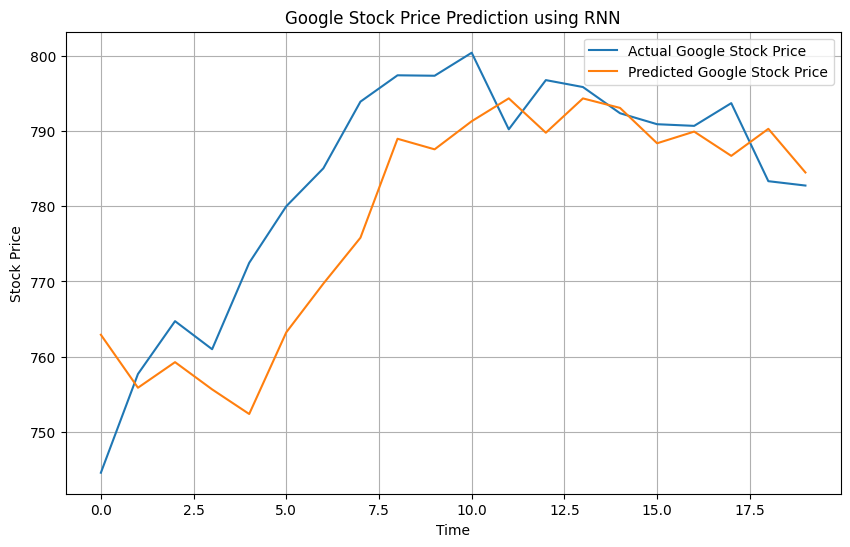

In [13]:
# Plot results
plt.figure(figsize=(10,6))
plt.plot(y_true, label='Actual Google Stock Price')
plt.plot(y_pred, label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Evaluate
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

In [15]:

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 103.46
Root Mean Squared Error (RMSE): 10.17
Mean Absolute Error (MAE): 8.04


In [ ]:
# accuracy
accuracy = 1 - mae / np.mean(y_true)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99
